## Googleドライブのマウント

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

In [3]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

No handles with labels found to put in legend.


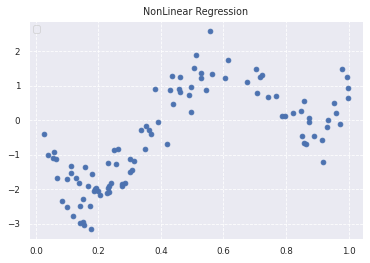

In [4]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
# numpy.random.rand(): 0.0以上、1.0未満の一様分布の乱数生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画
plt.scatter(data, target)
plt.title('NonLinear Regression')
plt.legend(loc=2)

線形回帰

0.4374549792288859


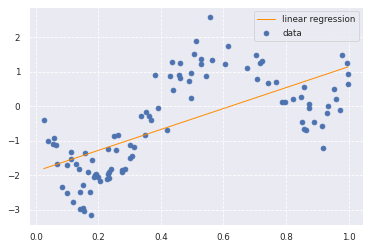

In [5]:
from sklearn.linear_model import LinearRegression
# fitメソッド：線形モデルの重みを学習
# predictメソッド：線形モデルから目的変数を予測
# scoreメソッド：決定係数（線形モデルがどの程度目的変数を説明できるか）を出力

clf = LinearRegression()
# 列ベクトルへの変換
# reshape(-1, 1)とすると列数だけが1と決まり、
# 行数は元の形状から推測して決定される
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

# data(x座標)に対応するy座標を予測
p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

非線形回帰

0.8779251282277554


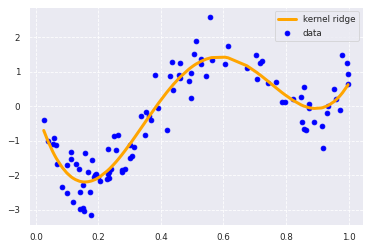

In [6]:
from sklearn.kernel_ridge import KernelRidge

# alphaを大きくすると正則化項が大きくなりカーブが緩やかになる
# defaultの1.0だと大きすぎて今回のデータにフィットしない
# alpha=0.0とすると正則化項がなくなるので過学習が起きる
# kernelはdefaultだとlinearで線形回帰を行う
# rbf（放射基底関数）を指定することで非線形回帰を行う
clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
print(clf.score(data, target))

0.8979383465474905


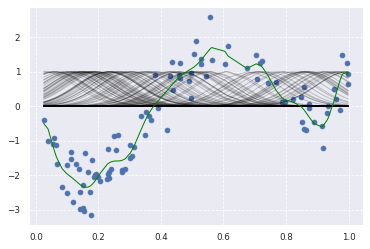

In [7]:
# RBFカーネルによる最小二乗学習
from sklearn.metrics.pairwise import rbf_kernel

kx = rbf_kernel(X=data, Y=data, gamma=50)

clf = LinearRegression()
clf.fit(kx, target)

p_rbf = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

plt.plot(data, p_rbf, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')

print(clf.score(kx, target))

0.8605671461790128
[[-0.03818661 -0.04616665 -0.0552737  -0.05835821 -0.0602958  -0.06207368
  -0.07141347 -0.07775442 -0.07789796 -0.08200401 -0.08254859 -0.08382295
  -0.08539412 -0.08668622 -0.08678769 -0.08685116 -0.08687987 -0.0867901
  -0.08663364 -0.08642627 -0.08534435 -0.08417367 -0.083932   -0.08296271
  -0.08137744 -0.08064679 -0.07999612 -0.0778643  -0.07596689 -0.06788872
  -0.06715647 -0.06685781 -0.06574812 -0.06562991 -0.06388742 -0.0606638
  -0.0578385  -0.05626135 -0.05230523 -0.05213972 -0.04845351 -0.04333603
  -0.04325194 -0.04213587 -0.03920566 -0.03210027 -0.02783007 -0.02625691
  -0.02247844 -0.01945685 -0.0134039  -0.00887028  0.00433891  0.01101468
   0.01412784  0.01640629  0.02693494  0.02854891  0.02872656  0.04478548
   0.04852987  0.04915253  0.05372488  0.05687864  0.06458474  0.06514945
   0.07216213  0.07613212  0.07818087  0.08785743  0.08869095  0.07918093
   0.06462229  0.06307595  0.05446507  0.04981611  0.0337832   0.01073123
  -0.00788634 -0.0156

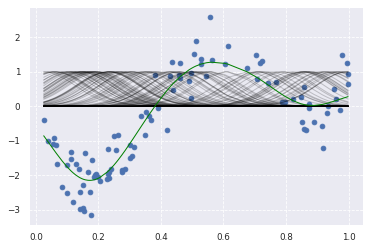

In [8]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)

ridge_clf = Ridge(alpha=30)
ridge_clf.fit(kx, target)

p_ridge = ridge_clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')

print(ridge_clf.score(kx, target))
print(ridge_clf.coef_)

多項式を基底関数とした非線形回帰モデル

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

0.4374549752459271
0.5977623599893666
0.6453540695651219
0.8830873011836072
0.8874729793266756
0.8884238836120318
0.8884532281708994
0.8885052275273716
0.8886131124902475
0.888813786628445


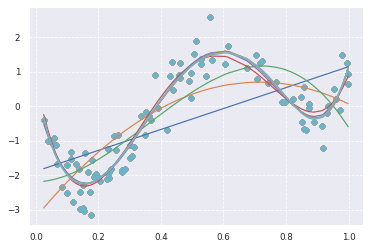

In [13]:
deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))
    print(regr.score(data, target))

カーネル回帰にラッソ推定量を適用したモデル
rbf_kernel：RBFカーネル関数
Lasso：ラッソ回帰モデル

1.1102230246251565e-16
[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


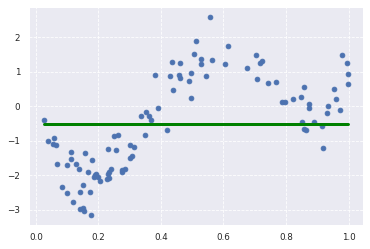

In [11]:
# Lasso
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)

lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))
print(lasso_clf.coef_)

サポートベクター回帰モデル(SVR)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5952646821807615


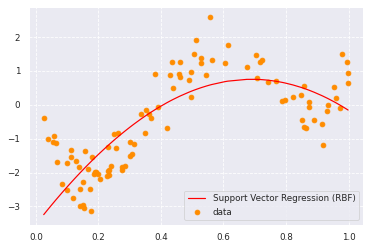

In [12]:
from sklearn import model_selection, preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)

print(clf_svr.score(data, target))
 
# plot
plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

Kerasによる深層学習実装

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

以下では，Googleドライブのマイドライブ直下にstudy_ai_mlフォルダを置くことを仮定しています．必要に応じて，パスを変更してください。

In [16]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

cb_cp = ModelCheckpoint('/content/drive/MyDrive/E資格/ステージ２/skl_ml/out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='/content/drive/MyDrive/E資格/ステージ２/skl_ml/out/tensorBoard', histogram_freq=0)

In [17]:
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

In [19]:
y_pred = estimator.predict(x_train)

18/18 [==============================] - 0s 10ms/step


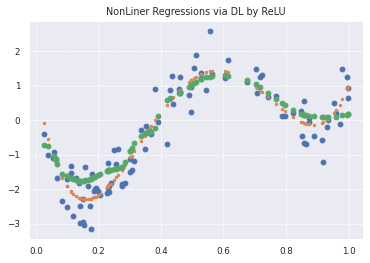

In [20]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')